#  MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem in R with MLR Package and K fold cross validation

By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | September 20, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

## I Introduction

This project presents a general way to run and compare several supervised learning algorithms applied to the classification problem, evaluating and selecting the best of them according to their performance by using the R library MLR. Seven metrics were selected to evaluate the models performance: Acc, Kappa, F1, AUC, Sensitivity (tpr), and Specificity (tnr).


The MLR library is very similar to[ Scikit-Learn ](http://scikit-learn.org/stable).(http://scikit-learn.org/stable/) from Python, wherein you could get all the functions required to do machine learning.

The entire structure of MLR library relies on this premise:

<i>- Create a Task</i>.<br> 
<i>- Make a Learner</i>. <br> 
<i>- Train Them</i>.<br> 

Creating a task means loading data in the package. Making a learner means choosing an algorithm ( learner)
which learns from task (or data). Finally, train them. Here you can learn more about MLR [  Machine Learning in R: mlr Tutorial  ](https://mlr-org.github.io/mlr-tutorial/devel/html/).

The supervised learning algorithms to be considered here are:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Random Forest Classifier (RF)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)

The dataset contains 5000 registers of clients who asked for a loan. There are six columns of measurements (fields) of the clients. These columns are the variables (features): MontoCredito; IngresoNeto; CoefCreditoAvaluo; MontoCuota; GradoAcademico.

The sixth column is the response variable "Tclient" which has two categories: Bad and Good. The dataset can be gotten from [  here ](http://www.arqmain.net/MLearning/Datasets/Loan2016last.csv).

<table align="left">
  <thead>
<u>Variables Overview</u>
    </thead>

      <tbody>
  <tr>
    <td><p aling="left"><b>MontoCredito</b> (Credit Amount)<br>

1 Very Low<br>
2 Low<br>
3 Medium<br>
4 High<br></p>
</td>
        <td><p aling="left"><b>MontoCuota</b> (AmountFee)<br>
1 Very Low<br>
2 Low<br>
3 Medium<br>
4 High<br></p>
</td>

  </tr>
  <tr>
    <td><p aling="left"><b>IngresoNeto</b> (Net Income)<br>

1 Very Low<br>
2 Low<br>
3 Medium<br>
4 High<br></p>
</td>
        <td><p aling="left"><b>GradoAcademico</b> (AcademicDegree)<br>
1 Bachelor<br>
2 Graduate<br>
3 Master<br>
4 Doctorate<br></p>
</td>

  </tr>
  <tr>
    <td><p aling="left"><b>CoeficienteCreditoAvaluo</b> (CoefficientCreditValuation)<br>
<br>Score from 1 to 12. The bigger the better.<br>
</p>
</td>
        <td><p aling="left"><b>Tclient</b> (Typeclient)<br>
1 Bad<br>
2 Good</p>
</td>

  </tr>  
   </tbody>
</table>


The performance metrics are evaluated by using the "K fold cross validation" method.  I consider 70% and 30% original dataset splitting for the training and testing datasets respectively. 

The k-fold cross validation method (also called just cross validation) is a resampling method that provides a more accurate estimate of algorithm performance.

TO GET MORE INFORMATION OVER KFOLD PROCCESSING:

How to Implement Resampling Methods From Scratch In Python  [ https://machinelearningmastery.com/implement-resampling-methods-scratch-python/  ]



The dataset used here is unbalanced in a proportion of 70.02% for "Good Clients" and 29.98% for "Bad clients". I use stratified sampling to get the train and test dataset, then I secure the original proportional representation for the categories of the response variable. 

The metrics presented to selec the models are the ones usually used for this kind of unbalanced dataset.  You can get more information about it in this publication by [ Shir Meir Lador: What metrics should be used for evaluating a model on an imbalanced data set? ](https://medium.com/towards-data-science/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba)

By the end of this project we will have covered the following topics, in a very specific way (of course):

* A way to import a dataset from a website to R. 
* A way to use R library to analyze the dataset. 
* A way to use some R libraries to quickly plot charts that could help us to understand the problem. 
* A way to use Machine Learning (ML) using MLR library to perform predictive analysis. 
* A way to compare different ML models, select one from them and present predictions for a new set of data. 
* A way to use analytical as well as technical skills to create an end-to-end project.


## II Loading and checking the data


### 21 Loading the data

In [1]:
# read and attach the dataset
filename <- "http://www.arqmain.net/MLearning/Datasets/Loan2016last.csv"

# load the CSV file from the local directory
df <- read.csv(filename, header=TRUE)
attach(df)

### 22 Checking the data

In [2]:
head(df)
names(df)
length(df$Tclient)

MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient
1,2,5,4,2,Good
4,1,12,2,1,Good
1,1,12,4,1,Good
1,1,11,4,2,Good
1,1,12,3,1,Good
3,2,12,3,1,Good


[1] "MontoCredito"      "IngresoNeto"       "CoefCreditoAvaluo"
[4] "MontoCuota"        "GradoAcademico"    "Tclient"

[1] 5000

In [2]:
#summarize full dataset by columns 
library(mlr)
summarizeColumns(df)

Loading required package: ParamHelpers


name,type,na,mean,disp,median,mad,min,max,nlevs
MontoCredito,integer,0,1.7830,0.9211301,1,0.0000,1,4,0
IngresoNeto,integer,0,1.5508,0.4974624,2,0.0000,1,2,0
CoefCreditoAvaluo,integer,0,10.3406,2.8903741,11,1.4826,1,12,0
MontoCuota,integer,0,2.7340,0.7627322,3,0.0000,1,4,0
GradoAcademico,integer,0,1.4832,0.4997677,1,0.0000,1,2,0
Tclient,factor,0,NA,0.1410000,NA,NA,705,4295,2


### How about missing values?

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


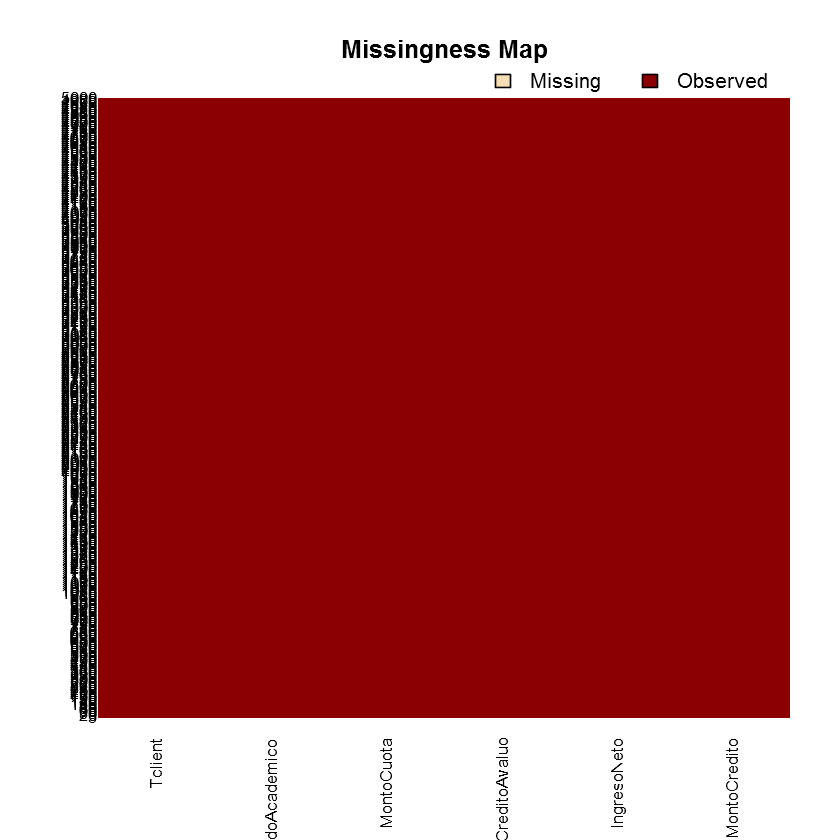

In [4]:
# This is a map for visualizing the missing rows (Package Amelia).
library(Amelia)
missmap(df)

In [5]:
#  A way to find all the rows in a data frame with at least one NA.
(row.has.na <- apply(df, 1, function(x){any(is.na(x))}))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [6]:
#  tell R to find all rows with missing values and list them fully.
df[ !complete.cases(df) , ]

MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient


So, there is no missing values in the full dataset.

## III Getting train and test datasets

In [3]:
#stratified sampling to get the train and test dataset
library(caret)
set.seed(7) # Set Seed so that same sample can be reproduced in future also
# considering response variable as strata
data_part <- createDataPartition(y = df$Tclient,  p = 0.70, list = F)
test <- df[-data_part,] # 30% data goes here
train <- df[data_part,] # 70% here

length(train$Tclient)
length(test$Tclient)

unloadNamespace("caret")

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train



[1] 3501

[1] 1499

In [8]:
#summarize train and test dataset by columns 
head(train)
head(test)

length(train$Tclient)
length(test$Tclient)

summarizeColumns(train)
summarizeColumns(test)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient
2,4,1,12,2,1,Good
3,1,1,12,4,1,Good
7,1,1,12,2,1,Good
8,1,2,12,3,1,Good
10,2,2,12,3,1,Good
11,1,2,7,3,2,Good


,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient
1,1,2,5,4,2,Good
4,1,1,11,4,2,Good
5,1,1,12,3,1,Good
6,3,2,12,3,1,Good
9,2,2,12,3,1,Good
13,2,2,7,1,1,Bad


[1] 3501

[1] 1499

name,type,na,mean,disp,median,mad,min,max,nlevs
MontoCredito,integer,0,1.804342,0.9333464,2,1.4826,1,4,0
IngresoNeto,integer,0,1.557555,0.4967473,2,0.0000,1,2,0
CoefCreditoAvaluo,integer,0,10.288489,2.9478625,11,1.4826,1,12,0
MontoCuota,integer,0,2.736361,0.7648830,3,0.0000,1,4,0
GradoAcademico,integer,0,1.485004,0.4998465,1,0.0000,1,2,0
Tclient,factor,0,NA,0.1411025,NA,NA,494,3007,2


name,type,na,mean,disp,median,mad,min,max,nlevs
MontoCredito,integer,0,1.733155,0.8902611,1,0,1,4,0
IngresoNeto,integer,0,1.535023,0.4989383,2,0,1,2,0
CoefCreditoAvaluo,integer,0,10.462308,2.7485426,12,0,1,12,0
MontoCuota,integer,0,2.728486,0.7579105,3,0,1,4,0
GradoAcademico,integer,0,1.478986,0.4997249,1,0,1,2,0
Tclient,factor,0,NA,0.1407605,NA,NA,211,1288,2


## IV Building models
 
I have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB, and SVM) algorithms. I use "set.seed(7)" so that same sample can be reproduced in the future and also it ensures the results are directly comparable.

The original full dataset does not need to be transformed in any of its features or response variable. All of their codification has been done in an ordinal ascendant way. At the same time, they do not need to be normalized as well.

For MLR, a task is nothing but the data set on which a learner learns. Since it’s a classification problem, we’ll create a classification task. So, the task type solely depends on the type of problem at hand.

Here you can learn more about MLR library [  Machine Learning in R: mlr Tutorial  ](https://github.com/mlr-org/mlr/).

In [4]:
#create a task
trainTask <- makeClassifTask(data = train,target = "Tclient")
testTask <- makeClassifTask(data = test, target = "Tclient")

In [10]:
trainTask

Supervised task: train
Type: classif
Target: Tclient
Observations: 3501
Features:
numerics  factors  ordered 
       5        0        0 
Missings: FALSE
Has weights: FALSE
Has blocking: FALSE
Classes: 2
 Bad Good 
 494 3007 
Positive class: Bad

As you can see, it provides a description of train data. However, an evident problem is that it is
considering positive class as Bad, whereas it should be Good. Let’s modify it:

In [5]:
trainTask <- makeClassifTask(data = train,target = "Tclient", positive = "Good")

In [12]:
trainTask 

Supervised task: train
Type: classif
Target: Tclient
Observations: 3501
Features:
numerics  factors  ordered 
       5        0        0 
Missings: FALSE
Has weights: FALSE
Has blocking: FALSE
Classes: 2
 Bad Good 
 494 3007 
Positive class: Good

In [13]:
str(getTaskData(trainTask))

'data.frame':	3501 obs. of  6 variables:
 $ MontoCredito     : int  4 1 1 1 2 1 1 1 3 1 ...
 $ IngresoNeto      : int  1 1 1 2 2 2 2 1 2 1 ...
 $ CoefCreditoAvaluo: int  12 12 12 12 12 7 12 12 1 12 ...
 $ MontoCuota       : int  2 4 2 3 3 3 2 4 1 3 ...
 $ GradoAcademico   : int  1 1 1 1 1 2 2 1 1 2 ...
 $ Tclient          : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 2 2 2 ...


MLR package has an in built function which returns the important variables from data. Let’s see which
variables are important. Later, we can use or not this knowledge to subset out input predictors for model
improvement. 

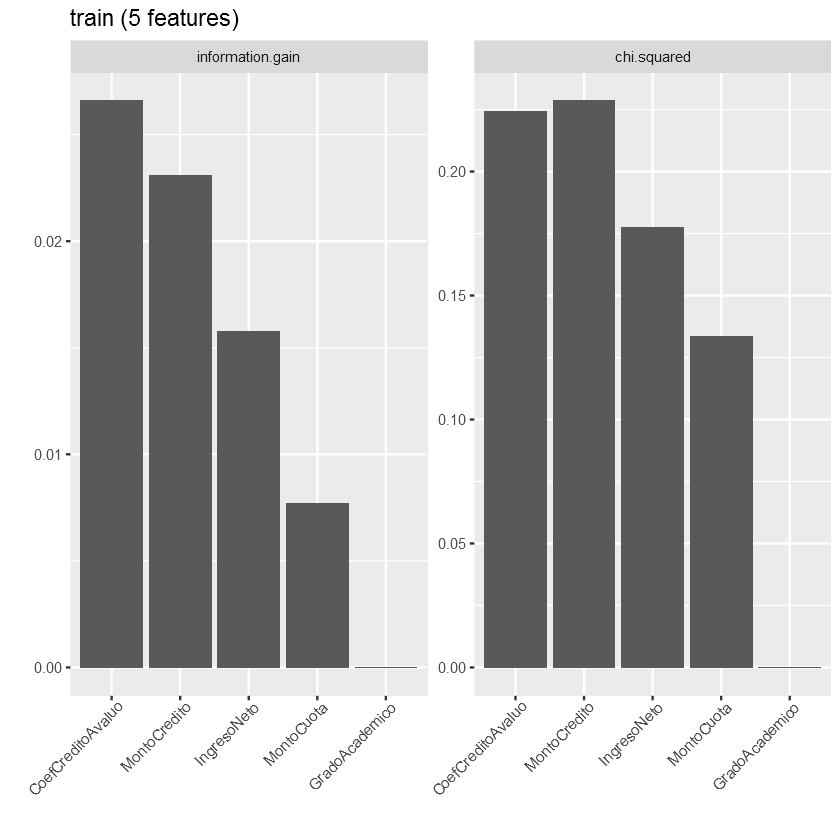

In [14]:
#Feature importance
im_feat <- generateFilterValuesData(trainTask, method = c("information.gain","chi.squared"))
plotFilterValues(im_feat,n.show = 10)

Information gain is generally used in context with decision trees. Every node split in a decision tree is based on information gain. In general, it tries to find out variables which carries the maximum information using which the target class is easier to predict.  Here you can learn more about MLR [  Feature Selection  ](https://mlr-org.github.io/mlr-tutorial/devel/html/feature_selection/index.html).

Let’s start modeling now. With MLR, we can choose and set algorithms using makeLearner. This learner will train on trainTask and try to make predictions on testTask .

### 4.1 Logistic Regression (LR)

In [6]:
#logistic regression
lrn1 = makeLearner("classif.logreg", predict.type = "prob")

In [7]:
#cross validation (cv) metrics
learner = lrn1
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, auc, tpr, tnr, fpr)
cv.lrn1 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [17]:
#cross validation metrics each fold
fitter<-c(1,1,1,1,1,1,1,1,1,1)
cvmetric1<-cv.lrn1$measures.test
cvmetric1$fitter<-fitter
cvmetric1

iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.8595989,0.05545429,0.9240310,0.7983673,0.9933333,0.04081633,0.9591837,1
2,0.8600000,0.05551272,0.9242658,0.7397790,0.9933555,0.04081633,0.9591837,1
3,0.8542857,0.09252669,0.9204368,0.6978778,0.9800664,0.08163265,0.9183673,1
4,0.8685714,0.10086005,0.9290123,0.7348295,1.0000000,0.06122449,0.9387755,1
5,0.8514286,0.04210526,0.9192547,0.7964333,0.9866667,0.04000000,0.9600000,1
6,0.8567335,0.04935716,0.9223602,0.7759864,0.9900000,0.04081633,0.9591837,1
7,0.8657143,0.09406322,0.9273570,0.7183538,0.9966777,0.06122449,0.9387755,1
8,0.8660969,0.14554307,0.9271318,0.7710631,0.9933555,0.10000000,0.9000000,1
9,0.8575499,0.07903023,0.9226006,0.7564784,0.9900332,0.06000000,0.9400000,1
10,0.8547009,0.04807232,0.9211747,0.7612957,0.9900332,0.04000000,0.9600000,1


In [8]:
#cross validation metrics average
round(cv.lrn1$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   auc.test.mean   tpr.test.mean 
         0.8595          0.0763          0.9238          0.7550          0.9914 
  tnr.test.mean   fpr.test.mean 
         0.0567          0.9433

In [19]:
#cross validation metrics summary
summarizeColumns(cv.lrn1$measures.test[,-1,-9])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.85946800,0.005691136,0.85857436,0.006050596,0.85142857,0.8685714,0
kappa,numeric,0,0.07625250,0.032562283,0.06727147,0.032888044,0.04210526,0.1455431,0
f1,numeric,0,0.92376250,0.003224095,0.92331581,0.003721443,0.91925466,0.9290123,0
auc,numeric,0,0.75504643,0.032629431,0.75888704,0.031998688,0.69787782,0.7983673,0
tpr,numeric,0,0.99135216,0.005474459,0.99168328,0.002487419,0.98006645,1.0000000,0
tnr,numeric,0,0.05665306,0.020717653,0.05040816,0.015431143,0.04000000,0.1000000,0
fpr,numeric,0,0.94334694,0.020717653,0.94959184,0.015431143,0.90000000,0.9600000,0


In [20]:
#Fit the model (train model)
mod1 = train(lrn1, trainTask)

In [21]:
getLearnerModel(mod1)


Call:  stats::glm(formula = f, family = "binomial", data = getTaskData(.task, 
    .subset), weights = .weights, model = FALSE)

Coefficients:
      (Intercept)       MontoCredito        IngresoNeto  CoefCreditoAvaluo  
           0.4387            -0.4997             0.8661             0.1153  
       MontoCuota     GradoAcademico  
          -0.5002             0.9195  

Degrees of Freedom: 3500 Total (i.e. Null);  3495 Residual
Null Deviance:	    2850 
Residual Deviance: 2529 	AIC: 2541

In [22]:
#Make predictions (predict on test data)
pred1 = predict(mod1, testTask)

In [23]:
#Get performance metrics on test data
#round(performance(pred1, measures = list(acc, kappa,f1, auc)),4)

#calculateROCMeasures(pred1)
#calculateConfusionMatrix(pred1)

### 4.2 Linear Discriminant Analysis (LDA)

In [9]:
#linear discriminant analysis
lrn2 = makeLearner("classif.lda", predict.type = "prob")

In [10]:
#cross validation (cv) metrics
learner = lrn2
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, auc, tpr, tnr, fpr)
cv.lrn2 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [26]:
#cross validation metrics each fold
fitter<-c(2,2,2,2,2,2,2,2,2,2)
cvmetric2<-cv.lrn2$measures.test
cvmetric2$fitter<-fitter
cvmetric2

iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.8485714,0.08049965,0.9170579,0.7548308,0.9734219,0.08163265,0.9183673,2
2,0.8624642,0.11167674,0.9252336,0.6951020,0.9900000,0.08163265,0.9183673,2
3,0.8347578,0.07748777,0.9085174,0.7445515,0.9568106,0.10000000,0.9000000,2
4,0.8342857,-0.04542177,0.9096573,0.7228965,0.9700997,0.00000000,1.0000000,2
5,0.8600000,0.12811388,0.9235569,0.7745271,0.9833887,0.10204082,0.8979592,2
6,0.8428571,0.09120952,0.9133858,0.7502204,0.9634551,0.10204082,0.8979592,2
7,0.8490028,0.01074182,0.9180835,0.7803987,0.9867110,0.02000000,0.9800000,2
8,0.8457143,0.10000000,0.9150943,0.7890000,0.9700000,0.10000000,0.9000000,2
9,0.8538682,0.11504997,0.9199372,0.7635714,0.9766667,0.10204082,0.8979592,2
10,0.8575499,0.18621905,0.9213836,0.8060797,0.9734219,0.16000000,0.8400000,2


In [11]:
#cross validation metrics average
round(cv.lrn2$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   auc.test.mean   tpr.test.mean 
         0.8489          0.0856          0.9172          0.7581          0.9744 
  tnr.test.mean   fpr.test.mean 
         0.0849          0.9151

In [28]:
#cross validation metrics summary
summarizeColumns(cv.lrn2$measures.test[,-1,-9])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.84890715,0.009815301,0.84878714,0.010891709,0.83428571,0.8624642,0
kappa,numeric,0,0.08555766,0.063752998,0.09560476,0.027844861,-0.04542177,0.1862190,0
f1,numeric,0,0.91719076,0.005597692,0.91757068,0.005928785,0.90851735,0.9252336,0
auc,numeric,0,0.75811781,0.032520503,0.75920113,0.027074865,0.69510204,0.8060797,0
tpr,numeric,0,0.97439756,0.010272921,0.97342193,0.009925047,0.95681063,0.9900000,0
tnr,numeric,0,0.08493878,0.045238637,0.10000000,0.015128571,0.00000000,0.1600000,0
fpr,numeric,0,0.91506122,0.045238637,0.90000000,0.015128571,0.84000000,1.0000000,0


In [29]:
#Fit the model (train model)
mod2 = train(lrn2, trainTask)

In [30]:
getLearnerModel(mod2)

Call:
lda(f, data = getTaskData(.task, .subset))

Prior probabilities of groups:
      Bad      Good 
0.1411025 0.8588975 

Group means:
     MontoCredito IngresoNeto CoefCreditoAvaluo MontoCuota GradoAcademico
Bad      2.283401    1.340081          9.473684   2.846154       1.388664
Good     1.725640    1.593282         10.422348   2.718324       1.500831

Coefficients of linear discriminants:
                         LD1
MontoCredito      -0.6304648
IngresoNeto        0.9753438
CoefCreditoAvaluo  0.1597088
MontoCuota        -0.5217203
GradoAcademico     1.0123442

In [31]:
#Make predictions (predict on test data)
pred2 = predict(mod2, testTask)

In [32]:
#Get performance metrics
#round(performance(pred2, measures =list(acc, kappa,f1, auc)),4)

#calculateROCMeasures(pred2)
#calculateConfusionMatrix(pred2)

### 4.3 K-Nearest Neighbors (KNN)

In [24]:
#K-Nearest Neighbors
lrn3 = makeLearner("classif.knn", predict.type = "response")

In [25]:
#cross validation (cv) metrics
learner = lrn3
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, tpr, tnr, fpr) 
cv.lrn3 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [71]:
#cross validation metrics each fold
fitter<-c(3,3,3,3,3,3,3,3,3,3)
auc<-c(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA)
cvmetric3<-cv.lrn3$measures.test
cvmetric3$fitter<-fitter
cvmetric3$auc<-auc
cvmetric3

iter,acc,kappa,f1,tpr,tnr,fpr,fitter,auc
1,0.9455587,0.7601201,0.9686985,0.9800000,0.7346939,0.2653061,3,NA
2,0.9457143,0.7559633,0.9689034,0.9866667,0.7000000,0.3000000,3,NA
3,0.9430199,0.7544939,0.9671053,0.9767442,0.7400000,0.2600000,3,NA
4,0.9571429,0.8071979,0.9754501,0.9900332,0.7551020,0.2448980,3,NA
5,0.9400000,0.7300771,0.9656301,0.9800664,0.6938776,0.3061224,3,NA
6,0.9369628,0.7090344,0.9640523,0.9833333,0.6530612,0.3469388,3,NA
7,0.9515670,0.7894718,0.9720854,0.9833887,0.7600000,0.2400000,3,NA
8,0.9514286,0.7730913,0.9723577,0.9933555,0.6938776,0.3061224,3,NA
9,0.9401709,0.7352466,0.9656301,0.9800664,0.7000000,0.3000000,3,NA
10,0.9514286,0.8000000,0.9717138,0.9700997,0.8367347,0.1632653,3,NA


In [26]:
#cross validation metrics average
round(cv.lrn3$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   tpr.test.mean   tnr.test.mean 
         0.9437          0.7496          0.9677          0.9817          0.7126 
  fpr.test.mean 
         0.2874

In [73]:
#cross validation metrics summary
summarizeColumns(cv.lrn3$measures.test[,-1,-8:9])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.9462994,0.006446392,0.9456365,0.008472000,0.9369628,0.9571429,0
kappa,numeric,0,0.7614697,0.031619694,0.7580417,0.037628170,0.7090344,0.8071979,0
f1,numeric,0,0.9691627,0.003657260,0.9688010,0.004701121,0.9640523,0.9754501,0
tpr,numeric,0,0.9823754,0.006652260,0.9816999,0.004933791,0.9700997,0.9933555,0
tnr,numeric,0,0.7267347,0.050845141,0.7173469,0.034795714,0.6530612,0.8367347,0
fpr,numeric,0,0.2732653,0.050845141,0.2826531,0.034795714,0.1632653,0.3469388,0


In [74]:
#Fit the model (train model)
mod3 = train(lrn3, trainTask)

In [75]:
getLearnerModel(mod3)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
2,4,1,12,2,1
3,1,1,12,4,1
7,1,1,12,2,1
8,1,2,12,3,1
10,2,2,12,3,1
11,1,2,7,3,2
12,1,2,12,2,2
15,1,1,12,4,1
17,3,2,1,1,1
18,1,1,12,3,2


In [76]:
#Get performance metrics
#round(performance(pred3, measures = list(acc, kappa,f1)),4)

#calculateROCMeasures(pred3)
#calculateConfusionMatrix(pred3)

In [77]:
#Make predictions (predict on test data)
pred3 = predict(mod3, testTask)

### 4.4 Classification and Regression Trees (CART)

In [12]:
#Classification and Regression Trees
lrn4 = makeLearner("classif.rpart", predict.type = "prob")

In [13]:
#cross validation (cv) metrics
learner = lrn4
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, auc, tpr, tnr, fpr)
cv.lrn4 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [34]:
#cross validation metrics each fold
fitter<-c(4,4,4,4,4,4,4,4,4,4)
cvmetric4<-cv.lrn4$measures.test
cvmetric4$fitter<-fitter
cvmetric4

iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.9316239,0.6770434,0.9611650,0.9132226,0.9867110,0.6000000,0.4000000,4
2,0.9428571,0.7251237,0.9676375,0.8679232,0.9933555,0.6326531,0.3673469,4
3,0.9572650,0.8108904,0.9754501,0.9105980,0.9900332,0.7600000,0.2400000,4
4,0.9400000,0.7197010,0.9658537,0.8950776,0.9867110,0.6530612,0.3469388,4
5,0.9485714,0.7664764,0.9705882,0.8949081,0.9867110,0.7142857,0.2857143,4
6,0.9428571,0.7454545,0.9672131,0.9007667,0.9833333,0.7000000,0.3000000,4
7,0.9601140,0.8185913,0.9771987,0.9312292,0.9966777,0.7400000,0.2600000,4
8,0.9570201,0.8071184,0.9753695,0.8958844,0.9900000,0.7551020,0.2448980,4
9,0.9314286,0.6634885,0.9612903,0.8752458,0.9900332,0.5714286,0.4285714,4
10,0.9398281,0.7248771,0.9656301,0.8978231,0.9833333,0.6734694,0.3265306,4


In [14]:
#cross validation metrics average
round(cv.lrn4$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   auc.test.mean   tpr.test.mean 
         0.9452          0.7459          0.9687          0.8983          0.9887 
  tnr.test.mean   fpr.test.mean 
         0.6800          0.3200

In [36]:
#cross validation metrics summary
summarizeColumns(cv.lrn4$measures.test[,-1,-8])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.9451565,0.010327354,0.9428571,0.012563179,0.9314286,0.9601140,0
kappa,numeric,0,0.7458765,0.054540440,0.7352891,0.066296675,0.6634885,0.8185913,0
f1,numeric,0,0.9687396,0.005757769,0.9674253,0.006892543,0.9611650,0.9771987,0
auc,numeric,0,0.8982679,0.018093979,0.8968537,0.013089275,0.8679232,0.9312292,0
tpr,numeric,0,0.9886899,0.004216803,0.9883555,0.002487419,0.9833333,0.9966777,0
tnr,numeric,0,0.6800000,0.065331344,0.6867347,0.079576286,0.5714286,0.7600000,0
fpr,numeric,0,0.3200000,0.065331344,0.3132653,0.079576286,0.2400000,0.4285714,0


In [37]:
#Fit the model (train model)
mod4 = train(lrn4, trainTask)

In [38]:
getLearnerModel(mod4)

n= 3501 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 3501 494 Good (0.14110254 0.85889746)  
    2) MontoCredito>=2.5 837 237 Good (0.28315412 0.71684588)  
      4) CoefCreditoAvaluo< 11.5 398 174 Good (0.43718593 0.56281407)  
        8) GradoAcademico< 1.5 116  34 Bad (0.70689655 0.29310345)  
         16) CoefCreditoAvaluo>=2.5 76   5 Bad (0.93421053 0.06578947) *
         17) CoefCreditoAvaluo< 2.5 40  11 Good (0.27500000 0.72500000)  
           34) MontoCuota>=2.5 11   2 Bad (0.81818182 0.18181818) *
           35) MontoCuota< 2.5 29   2 Good (0.06896552 0.93103448) *
        9) GradoAcademico>=1.5 282  92 Good (0.32624113 0.67375887)  
         18) MontoCuota< 1.5 21   4 Bad (0.80952381 0.19047619) *
         19) MontoCuota>=1.5 261  75 Good (0.28735632 0.71264368)  
           38) CoefCreditoAvaluo>=7.5 167  67 Good (0.40119760 0.59880240)  
             76) CoefCreditoAvaluo< 9.5 37   6 Bad (0.83783784 0.16216216) *
             77) CoefCred

In [39]:
#Make predictions (predict on test data)
pred4 = predict(mod4, testTask)

In [40]:
#Get performance metrics
#round(performance(pred4, measures = list(acc, kappa,f1, auc)),4)

#calculateROCMeasures(pred4)
#calculateConfusionMatrix(pred4)

### 4.5 Random Forest Classifier (RF)

In [15]:
#Random Forest Classifier 
lrn5 = makeLearner("classif.randomForest", par.vals = list(ntree = 200, mtry = 3), predict.type = "prob")

In [16]:
#cross validation (cv) metrics
learner = lrn5
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, auc, tpr, tnr, fpr)
cv.lrn5 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [43]:
#cross validation metrics each fold
fitter<-c(5,5,5,5,5,5,5,5,5,5)
cvmetric5<-cv.lrn5$measures.test
cvmetric5$fitter<-fitter
cvmetric5

iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.9657143,0.8443176,0.9803922,0.9372500,0.9966777,0.7755102,0.2244898,5
2,0.9544160,0.7887610,0.9740260,0.9147176,0.9966777,0.7000000,0.3000000,5
3,0.9512894,0.7814008,0.9720854,0.9282313,0.9866667,0.7346939,0.2653061,5
4,0.9514286,0.7814910,0.9721768,0.9587769,0.9867110,0.7346939,0.2653061,5
5,0.9373219,0.7299433,0.9638158,0.9083056,0.9734219,0.7200000,0.2800000,5
6,0.9173789,0.6343881,0.9525368,0.8817940,0.9667774,0.6200000,0.3800000,5
7,0.9457143,0.7559633,0.9689034,0.9107333,0.9866667,0.7000000,0.3000000,5
8,0.9428571,0.7405293,0.9673203,0.9389789,0.9833887,0.6938776,0.3061224,5
9,0.9398281,0.7248771,0.9656301,0.9076871,0.9833333,0.6734694,0.3265306,5
10,0.9542857,0.7998999,0.9736842,0.9445725,0.9833887,0.7755102,0.2244898,5


In [17]:
#cross validation metrics average
round(cv.lrn5$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   auc.test.mean   tpr.test.mean 
         0.9460          0.7582          0.9691          0.9231          0.9844 
  tnr.test.mean   fpr.test.mean 
         0.7128          0.2872

In [45]:
#cross validation metrics summary
summarizeColumns(cv.lrn5$measures.test[,-1,-8])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.9460234,0.013030319,0.9485018,0.008671716,0.9173789,0.9657143,0
kappa,numeric,0,0.7581572,0.056495155,0.7686821,0.044011448,0.6343881,0.8443176,0
f1,numeric,0,0.9690571,0.007517841,0.9704944,0.004982545,0.9525368,0.9803922,0
auc,numeric,0,0.9231047,0.022603868,0.9214745,0.021914984,0.8817940,0.9587769,0
tpr,numeric,0,0.9843710,0.009136925,0.9850277,0.002503837,0.9667774,0.9966777,0
tnr,numeric,0,0.7127755,0.046809464,0.7100000,0.036611143,0.6200000,0.7755102,0
fpr,numeric,0,0.2872245,0.046809464,0.2900000,0.036611143,0.2244898,0.3800000,0


In [46]:
#Fit the model (train model)
mod5 = train(lrn5, trainTask)

In [47]:
getLearnerModel(mod5)


Call:
 randomForest(formula = f, data = data, classwt = classwt, cutoff = cutoff,      ntree = 200, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 5.23%
Confusion matrix:
     Bad Good class.error
Bad  356  138  0.27935223
Good  45 2962  0.01496508

In [48]:
#Make predictions (predict on test data)
pred5 = predict(mod5, testTask)


In [49]:
#Get performance metrics
#round(performance(pred5, measures = list(acc, kappa,f1, auc)),4)

#calculateROCMeasures(pred5)
#calculateConfusionMatrix(pred5)

### 4.6 Gaussian Naive Bayes (NB)

In [18]:
#support vector machine
lrn6 = makeLearner("classif.naiveBayes", predict.type = "prob")

In [19]:
#cross validation (cv) metrics
learner = lrn6
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, auc, tpr, tnr, fpr) 
cv.lrn6 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [52]:
#cross validation metrics each fold
fitter<-c(6,6,6,6,6,6,6,6,6,6)
cvmetric6<-cv.lrn6$measures.test
cvmetric6$fitter<-fitter
cvmetric6

iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.8257143,0.117987276,0.9020867,0.7659163,0.9335548,0.16326531,0.8367347,6
2,0.8205128,0.009229804,0.9004739,0.7409635,0.9468439,0.06000000,0.9400000,6
3,0.8114286,0.014925373,0.8945687,0.7431690,0.9302326,0.08163265,0.9183673,6
4,0.8366762,0.057962779,0.9099526,0.7603741,0.9600000,0.08163265,0.9183673,6
5,0.8347578,0.077487765,0.9085174,0.7995017,0.9568106,0.10000000,0.9000000,6
6,0.8452722,0.118026956,0.9145570,0.8094898,0.9633333,0.12244898,0.8775510,6
7,0.8119658,-0.004074202,0.8952381,0.7114286,0.9368771,0.06000000,0.9400000,6
8,0.8285714,0.042756860,0.9050633,0.7351685,0.9501661,0.08163265,0.9183673,6
9,0.8347578,0.117631761,0.9079365,0.7915947,0.9501661,0.14000000,0.8600000,6
10,0.8280802,0.064008582,0.9044586,0.6952381,0.9466667,0.10204082,0.8979592,6


In [20]:
#cross validation metrics average
round(cv.lrn6$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   auc.test.mean   tpr.test.mean 
         0.8283          0.0648          0.9046          0.7525          0.9478 
  tnr.test.mean   fpr.test.mean 
         0.1012          0.8988

In [54]:
#cross validation metrics summary
summarizeColumns(cv.lrn6$measures.test[,-1,-8])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.82777372,0.010841040,0.82832583,0.010559829,0.811428571,0.8452722,0
kappa,numeric,0,0.06159430,0.046384694,0.06098568,0.072511137,-0.004074202,0.1180270,0
f1,numeric,0,0.90428527,0.006369434,0.90476094,0.005962585,0.894568690,0.9145570,0
auc,numeric,0,0.75528443,0.037470263,0.75177159,0.041828741,0.695238095,0.8094898,0
tpr,numeric,0,0.94746512,0.011127746,0.94850498,0.014678233,0.930232558,0.9633333,0
tnr,numeric,0,0.09926531,0.033858039,0.09081633,0.031164857,0.060000000,0.1632653,0
fpr,numeric,0,0.90073469,0.033858039,0.90918367,0.031164857,0.836734694,0.9400000,0


In [55]:
#Fit the model (train model)
mod6 = train(lrn6, trainTask)

In [56]:
getLearnerModel(mod6)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      Bad      Good 
0.1411025 0.8588975 

Conditional probabilities:
      MontoCredito
Y          [,1]      [,2]
  Bad  2.283401 1.0449569
  Good 1.725640 0.8895514

      IngresoNeto
Y          [,1]      [,2]
  Bad  1.340081 0.4742163
  Good 1.593282 0.4913030

      CoefCreditoAvaluo
Y           [,1]     [,2]
  Bad   9.473684 3.108960
  Good 10.422348 2.899263

      MontoCuota
Y          [,1]      [,2]
  Bad  2.846154 0.9055919
  Good 2.718324 0.7378243

      GradoAcademico
Y          [,1]      [,2]
  Bad  1.388664 0.4879408
  Good 1.500831 0.5000825


In [57]:
#Make predictions (predict on test data)
pred6 = predict(mod6, testTask)

In [58]:
#Get performance metrics
#round(performance(pred6, measures = list(acc, kappa,f1, auc)),4)

#calculateROCMeasures(pred6)
#calculateConfusionMatrix(pred6)

### 4.7 Support Vector Machine (SVM)

In [21]:
#support vector machine
lrn7 = makeLearner("classif.ksvm", predict.type = "prob")

In [22]:
#cross validation (cv) metrics
learner = lrn7
task = trainTask
iters = 10
stratify = TRUE
measures = list(acc, kappa, f1, auc, tpr, tnr, fpr) 
cv.lrn7 <- crossval(learner, task, iters, stratify, measures, show.info = F)

In [61]:
#cross validation metrics each fold
fitter<-c(7,7,7,7,7,7,7,7,7,7)
cvmetric7<-cv.lrn7$measures.test
cvmetric7$fitter<-fitter
cvmetric7

iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.9485714,0.7620307,0.9706840,0.8630755,0.9900332,0.6938776,0.3061224,7
2,0.9428571,0.7405293,0.9673203,0.9205370,0.9833887,0.6938776,0.3061224,7
3,0.9485714,0.7622642,0.9706840,0.9426667,0.9933333,0.6800000,0.3200000,7
4,0.9200000,0.6230769,0.9545455,0.8563667,0.9800000,0.5600000,0.4400000,7
5,0.9484241,0.7573206,0.9706840,0.9286054,0.9933333,0.6734694,0.3265306,7
6,0.9257143,0.6426608,0.9579288,0.8890094,0.9833887,0.5714286,0.4285714,7
7,0.9342857,0.6869897,0.9627229,0.8825005,0.9867110,0.6122449,0.3877551,7
8,0.9373219,0.7201160,0.9640523,0.8357475,0.9800664,0.6800000,0.3200000,7
9,0.9430199,0.7359513,0.9675325,0.9310299,0.9900332,0.6600000,0.3400000,7
10,0.9200000,0.6074033,0.9548387,0.8220557,0.9833887,0.5306122,0.4693878,7


In [23]:
#cross validation metrics average
round(cv.lrn7$aggr,4)

acc.test.mean kappa.test.mean    f1.test.mean   auc.test.mean   tpr.test.mean 
         0.9357          0.6982          0.9634          0.8927          0.9857 
  tnr.test.mean   fpr.test.mean 
         0.6316          0.3684

In [63]:
#cross validation metrics summary
summarizeColumns(cv.lrn7$measures.test[,-1,-8])

name,type,na,mean,disp,median,mad,min,max,nlevs
acc,numeric,0,0.9368766,0.011457832,0.9400895,0.012466010,0.9200000,0.9485714,0
kappa,numeric,0,0.7038343,0.059769373,0.7280336,0.050577109,0.6074033,0.7622642,0
f1,numeric,0,0.9640993,0.006405240,0.9656863,0.007409686,0.9545455,0.9706840,0
auc,numeric,0,0.8871594,0.042521291,0.8857550,0.057548968,0.8220557,0.9426667,0
tpr,numeric,0,0.9863677,0.005065205,0.9850498,0.007388372,0.9800000,0.9933333,0
tnr,numeric,0,0.6355510,0.061613413,0.6667347,0.040242000,0.5306122,0.6938776,0
fpr,numeric,0,0.3644490,0.061613413,0.3332653,0.040242000,0.3061224,0.4693878,0


In [64]:
#Fit the model (train model)
mod7 = train(lrn7, trainTask)

In [65]:
getLearnerModel(mod7)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.199309543761982 

Number of Support Vectors : 786 

Objective Function Value : -601.7842 
Probability model included. 

In [66]:
#Make predictions (predict on test data)
pred7 = predict(mod7, testTask)

In [67]:
#Get performance metrics
#round(performance(pred7, measures = list(acc, kappa,f1, auc)),4)

#calculateROCMeasures(pred7)
#calculateConfusionMatrix(pred7)

In [68]:
(cv.lrn6$measures.test)

iter,acc,kappa,f1,auc,tpr,tnr,fpr
1,0.8257143,0.117987276,0.9020867,0.7659163,0.9335548,0.16326531,0.8367347
2,0.8205128,0.009229804,0.9004739,0.7409635,0.9468439,0.06000000,0.9400000
3,0.8114286,0.014925373,0.8945687,0.7431690,0.9302326,0.08163265,0.9183673
4,0.8366762,0.057962779,0.9099526,0.7603741,0.9600000,0.08163265,0.9183673
5,0.8347578,0.077487765,0.9085174,0.7995017,0.9568106,0.10000000,0.9000000
6,0.8452722,0.118026956,0.9145570,0.8094898,0.9633333,0.12244898,0.8775510
7,0.8119658,-0.004074202,0.8952381,0.7114286,0.9368771,0.06000000,0.9400000
8,0.8285714,0.042756860,0.9050633,0.7351685,0.9501661,0.08163265,0.9183673
9,0.8347578,0.117631761,0.9079365,0.7915947,0.9501661,0.14000000,0.8600000
10,0.8280802,0.064008582,0.9044586,0.6952381,0.9466667,0.10204082,0.8979592


In [78]:
allcvmetrics <- rbind(cvmetric1, cvmetric2, cvmetric3, cvmetric4, cvmetric5, cvmetric6, cvmetric7) 
head(allcvmetrics)
(allcvmetrics)


iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.8595989,0.05545429,0.9240310,0.7983673,0.9933333,0.04081633,0.9591837,1
2,0.8600000,0.05551272,0.9242658,0.7397790,0.9933555,0.04081633,0.9591837,1
3,0.8542857,0.09252669,0.9204368,0.6978778,0.9800664,0.08163265,0.9183673,1
4,0.8685714,0.10086005,0.9290123,0.7348295,1.0000000,0.06122449,0.9387755,1
5,0.8514286,0.04210526,0.9192547,0.7964333,0.9866667,0.04000000,0.9600000,1
6,0.8567335,0.04935716,0.9223602,0.7759864,0.9900000,0.04081633,0.9591837,1


iter,acc,kappa,f1,auc,tpr,tnr,fpr,fitter
1,0.8595989,0.05545429,0.9240310,0.7983673,0.9933333,0.04081633,0.9591837,1
2,0.8600000,0.05551272,0.9242658,0.7397790,0.9933555,0.04081633,0.9591837,1
3,0.8542857,0.09252669,0.9204368,0.6978778,0.9800664,0.08163265,0.9183673,1
4,0.8685714,0.10086005,0.9290123,0.7348295,1.0000000,0.06122449,0.9387755,1
5,0.8514286,0.04210526,0.9192547,0.7964333,0.9866667,0.04000000,0.9600000,1
6,0.8567335,0.04935716,0.9223602,0.7759864,0.9900000,0.04081633,0.9591837,1
7,0.8657143,0.09406322,0.9273570,0.7183538,0.9966777,0.06122449,0.9387755,1
8,0.8660969,0.14554307,0.9271318,0.7710631,0.9933555,0.10000000,0.9000000,1
9,0.8575499,0.07903023,0.9226006,0.7564784,0.9900332,0.06000000,0.9400000,1
10,0.8547009,0.04807232,0.9211747,0.7612957,0.9900332,0.04000000,0.9600000,1


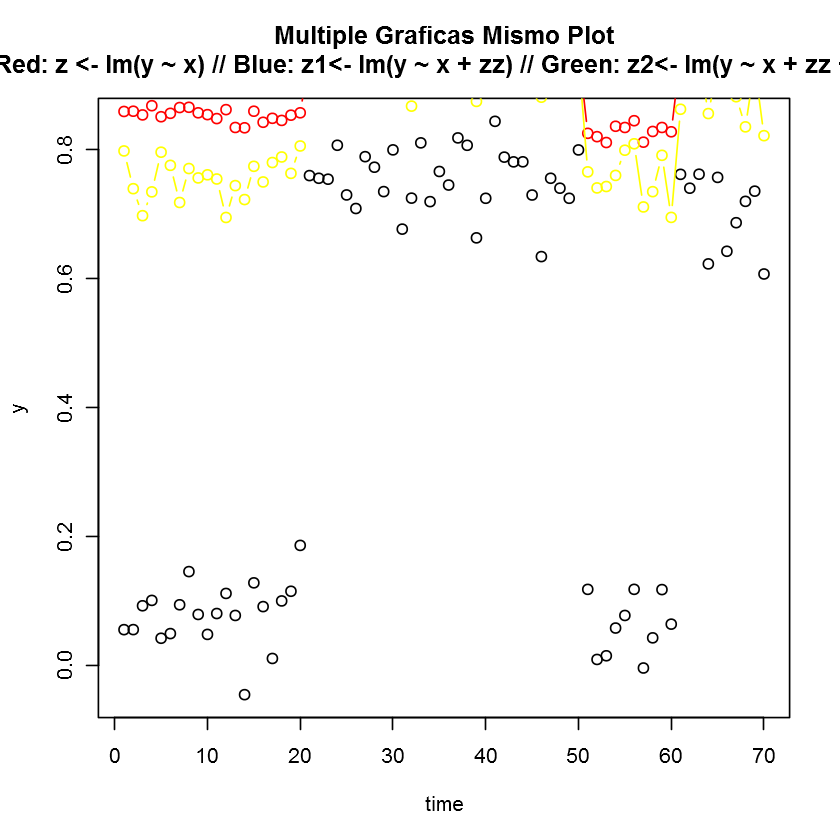

## V Selecting best model
 
I have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB, and SVM) algorithms. I reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable. 
 
We now have 7 models and seven usual metrics: Acc, Kappa, F1, AUC, Sensitivity, and Specificity. We need to compare the models to each other and select the one with better metric's performance.

As a general appreciation, all models have good accuracy scores but have an unbalanced dataset and for this kind of data, the accuracy (ACC) is not the best metric to be considered alone.  So we can get a table with the summary of all metric for each of the models.

<table align="left">
  <thead>
  <tr>
    <th >Model</th>
    <th >Acc</th>
    <th>Kappa</th>
    <th>F1</th>
        <th>AUC</th>
            <th>Sensitivity</th>
                <th>Specitivity</th>
  </tr>
    </thead>
      <tbody>
  <tr>
    <td>LR</td>
        <td>0.8595</td>
    <td>0.0763</td>
        <td>0.9238</td>
                <td>0.7550</td>
                        <td>0.9914</td>
                                <td>0.0567</td>
  </tr>
  <tr>
    <td>LDA</td>
        <td>0.8489</td>
    <td>0.0856</td>
        <td>0.9172</td>
                <td>0.7581</td>
                        <td>0.9744</td>
                                <td>0.0849</td>
  </tr>
  <tr>
    <td>KNN</td>
        <td>0.9437</td>
    <td>0.7496</td>
        <td>0.9677</td>
                <td>---</td>
                        <td>0.9817</td>
                                <td>0.7126</td>
  </tr>
  <tr>
    <td>CART</td>
        <td>0.9452</td>
    <td>0.7459</td>
        <td>0.9687</td>
                <td>0.8983</td>
                        <td>0.9887</td>
                                <td>0.6800</td>
  </tr>
  <tr>
    <td>RF</td>
        <td>0.9460</td>
    <td>0.7582</td>
        <td>0.9691</td>
                <td>0.9231</td>
                        <td>0.9844</td>
                                <td>0.7128</td>
  </tr>
  <tr>
    <td>NB</td>
        <td>0.8283</td>
    <td>0.0648</td>
        <td>0.9046</td>
                <td>0.7525</td>
                        <td>0.9478</td>
                                <td>0.1012</td>
  </tr>
    <tr>
    <td>SVM</td>
        <td>0.9357</td>
    <td>0.6982</td>
        <td>0.9634</td>
                <td>0.8927</td>
                        <td>0.9857</td>
                                <td>0.3684</td>
  </tr>
   </tbody>
</table>

The following chart gives us individual ROC curve plot for each model except KNN. The next one, present all ROC curves in the same plot.  So we can see the differents ROC's shapes and which of the models has a bigger AUC associated metric.  In our case, all models are under RF curve meaning that RF's model is the one which has bigger AUC metric.

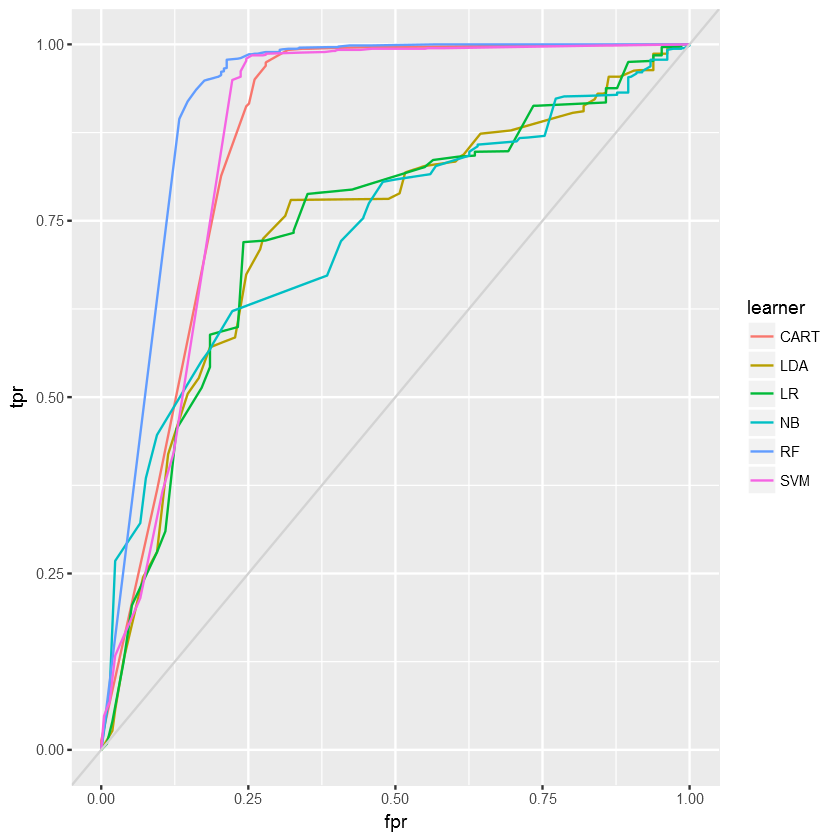

In [90]:
q<-qplot(x = fpr, y = tpr, color = learner, data = df$data, geom = "path")

q + geom_abline(intercept = 0, slope = 1, color="lightgray")

Finally, on evaluating the models, we find that RF (Random Forest) achieves a better training metrics than all the rest. As we were expecting all models have good accuracy scores, but for an unbalanced dataset this metric must no be considered alone. 

## VI Making predictions
 
The RF algorithm was chosen as the best model that we tested. Now we want to get the predictions from the model on our validation set.

In [91]:
as.data.frame(pred5)

,id,truth,prob.Bad,prob.Good,response
1,1,Good,0.000,1.000,Good
4,2,Good,0.000,1.000,Good
5,3,Good,0.000,1.000,Good
6,4,Good,0.000,1.000,Good
9,5,Good,0.000,1.000,Good
13,6,Bad,0.780,0.220,Bad
14,7,Bad,0.990,0.010,Bad
16,8,Bad,0.005,0.995,Good
20,9,Good,0.000,1.000,Good
26,10,Good,0.000,1.000,Good


Now if we want to get the predictions from a new test data, we can do it as follows.

In [93]:
# new test data 
(new_data <- data.frame(MontoCredito=c(1, 1, 2), IngresoNeto=c(2,1,2), CoefCreditoAvaluo=c(5,1,2), MontoCuota=c(4,12,7), GradoAcademico=c(2,1,1)))
# make prediction
prediction = predict(mod5, newdata = new_data)
# show the result
for (i in 1:length(new_data[,1])){
  print(paste("Data",i,":","CLIENT with MontoCredito=", new_data[i,1],"IngresoNeto=", new_data[i,2], "CoefCreditoAvaluo=", new_data[i,3],"MontoCuota=",new_data[i,4],"GradoAcademico=",new_data[i,5], "will be -->", as.data.frame(prediction)$response[i]))
}

MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
1,2,5,4,2
1,1,1,12,1
2,2,2,7,1


[1] "Data 1 : CLIENT with MontoCredito= 1 IngresoNeto= 2 CoefCreditoAvaluo= 5 MontoCuota= 4 GradoAcademico= 2 will be --> Good"
[1] "Data 2 : CLIENT with MontoCredito= 1 IngresoNeto= 1 CoefCreditoAvaluo= 1 MontoCuota= 12 GradoAcademico= 1 will be --> Bad"
[1] "Data 3 : CLIENT with MontoCredito= 2 IngresoNeto= 2 CoefCreditoAvaluo= 2 MontoCuota= 7 GradoAcademico= 1 will be --> Bad"


## VII Conclusion

This project provides an introduction to get started with predictive analysis using R and MLR library. The idea here is to provide a basic understanding of getting started with a machine learning problem and how to use data visualization to comprehend a problem better.

Improving the models can be done by tuning their parameters. Every Machine Learning model comes with a variety of parameters to tune and these parameters can be vitally important to the performance of our classifier.

Finally, "cross validation" is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single "train/test split". Methods like "K-fold Cross Validation", "Leave One Out Cross Validation", and "Repeated Random Test-Train Splits" are the most known ones.  Of course, the door is opening for anybody who wants to try developing this project by using one of those "cross validation" methods to measure the accuracy of the models involved. I am putting in a line to develop a project like that after finishing some other important machine learning stuff that I am already working on.

<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | September 20, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]